In [34]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import zipfile
import io

# ✅ Correct way: take first uploaded filename
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as z:
    z.extractall("accident_data")

print("✅ Files extracted into 'accident_data' folder")

✅ Files extracted into 'accident_data' folder


In [36]:
import os
os.listdir("accident_data")

['US_Accidents_March23.csv']

In [ ]:
import pandas as pd

cols_needed = ['ID','Start_Time','End_Time','Weather_Condition','Temperature(F)',
               'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)',
               'Severity','Street','City','State','Start_Lat','Start_Lng']

df = pd.read_csv("accident_data/US_Accidents_March23.csv", usecols=cols_needed, low_memory=False)

print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
df.head()

✅ Dataset Loaded Successfully
Shape: (7728394, 15)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,City,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,I-70 E,Dayton,OH,36.9,91.0,29.68,10.0,NaN,Light Rain
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,Brice Rd,Reynoldsburg,OH,37.9,100.0,29.65,10.0,NaN,Light Rain
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,State Route 32,Williamsburg,OH,36.0,100.0,29.67,10.0,3.5,Overcast
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,I-75 S,Dayton,OH,35.1,96.0,29.64,9.0,4.6,Mostly Cloudy
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,Miamisburg Centerville Rd,Dayton,OH,36.0,89.0,29.65,6.0,3.5,Mostly Cloudy


In [ ]:
df.info()

# Missing values
df.isnull().sum().sort_values(ascending=False).head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Start_Lat          float64
 5   Start_Lng          float64
 6   Street             object 
 7   City               object 
 8   State              object 
 9   Temperature(F)     float64
 10  Humidity(%)        float64
 11  Pressure(in)       float64
 12  Visibility(mi)     float64
 13  Wind_Speed(mph)    float64
 14  Weather_Condition  object 
dtypes: float64(7), int64(1), object(7)
memory usage: 884.4+ MB


,0
Wind_Speed(mph),571233
Visibility(mi),177098
Humidity(%),174144
Weather_Condition,173459
Temperature(F),163853
Pressure(in),140679
Street,10869
City,253
Start_Lat,0
Start_Lng,0


In [ ]:
# Drop rows where critical info is missing
df = df.dropna(subset=['Weather_Condition', 'Start_Time', 'City', 'State'])

# Fill numeric columns with median
num_cols = ['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print("✅ After cleaning:", df.shape)

✅ After cleaning: (7554693, 15)


In [3]:
import zipfile
import pandas as pd
import os

# Step 1: Unzip the archive
with zipfile.ZipFile("archive (1).zip", 'r') as z:
    z.extractall("accident_data")

# Step 2: Check extracted files
print(os.listdir("accident_data"))

# Step 3: Load only 'Start_Time' column
df = pd.read_csv("accident_data/US_Accidents_March23.csv", usecols=['Start_Time'])

# Step 4: Convert 'Start_Time' to datetime (fix nanosecond issue)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', format='mixed')

# Step 5: Extract hour, day, month
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

# Step 6: Show result
print(df.head())




['US_Accidents_March23.csv']
           Start_Time  Hour     Day     Month
0 2016-02-08 05:46:00     5  Monday  February
1 2016-02-08 06:07:59     6  Monday  February
2 2016-02-08 06:49:27     6  Monday  February
3 2016-02-08 07:23:34     7  Monday  February
4 2016-02-08 07:39:07     7  Monday  February


/tmp/ipython-input-1337683311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


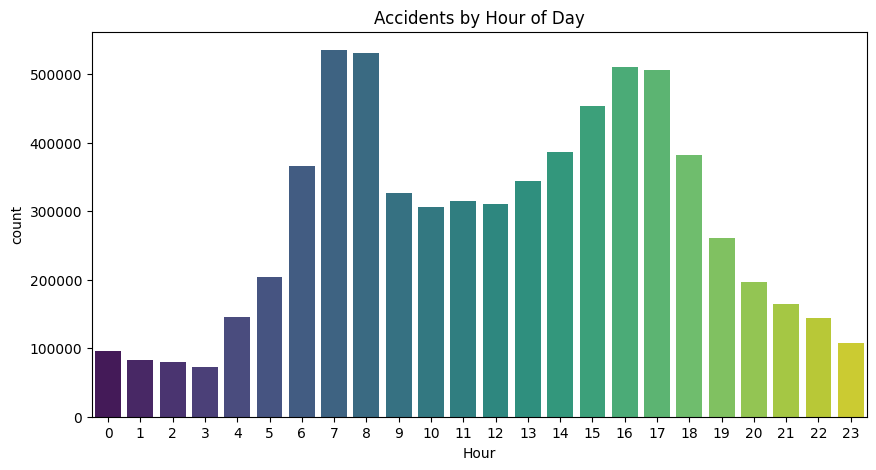

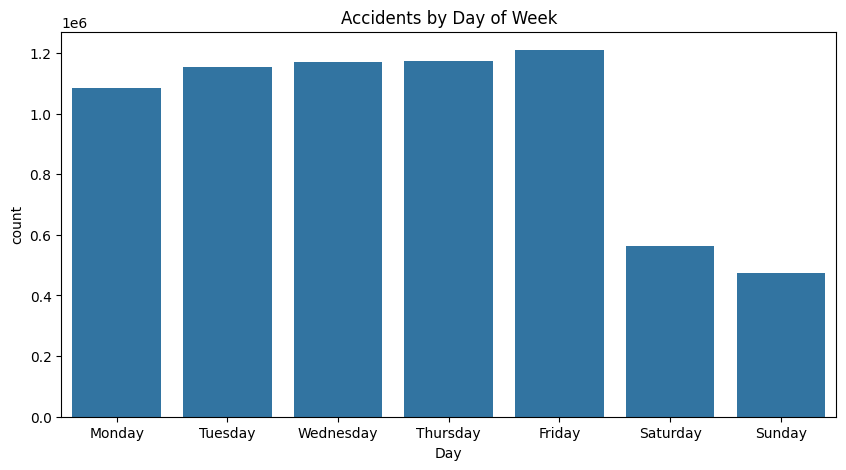

/tmp/ipython-input-1337683311.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.index, y=top_weather.values, palette='magma')


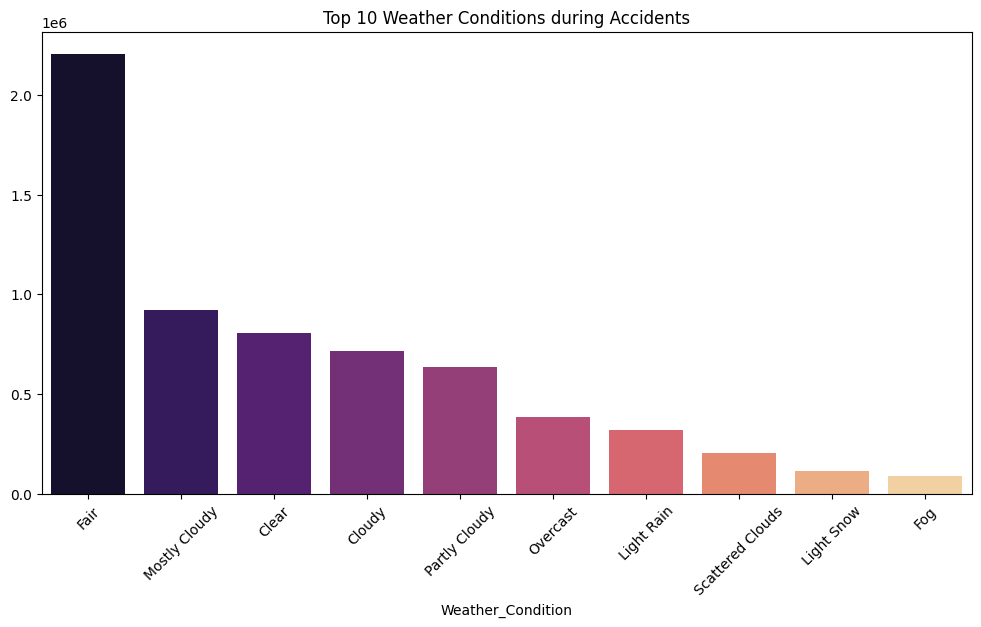

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accident count by hour
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title("Accidents by Hour of Day")
plt.show()

# Accident count by day
plt.figure(figsize=(10,5))
sns.countplot(x='Day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Accidents by Day of Week")
plt.show()

# Weather conditions
plt.figure(figsize=(12,6))
top_weather = df['Weather_Condition'].value_counts().head(10)
sns.barplot(x=top_weather.index, y=top_weather.values, palette='magma')
plt.title("Top 10 Weather Conditions during Accidents")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2884847492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')


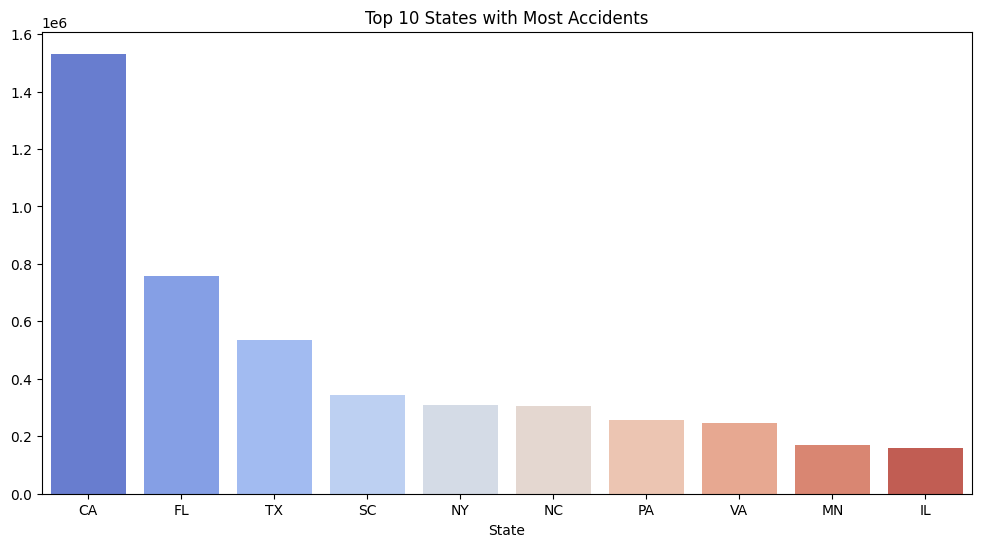

/tmp/ipython-input-2884847492.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='plasma')


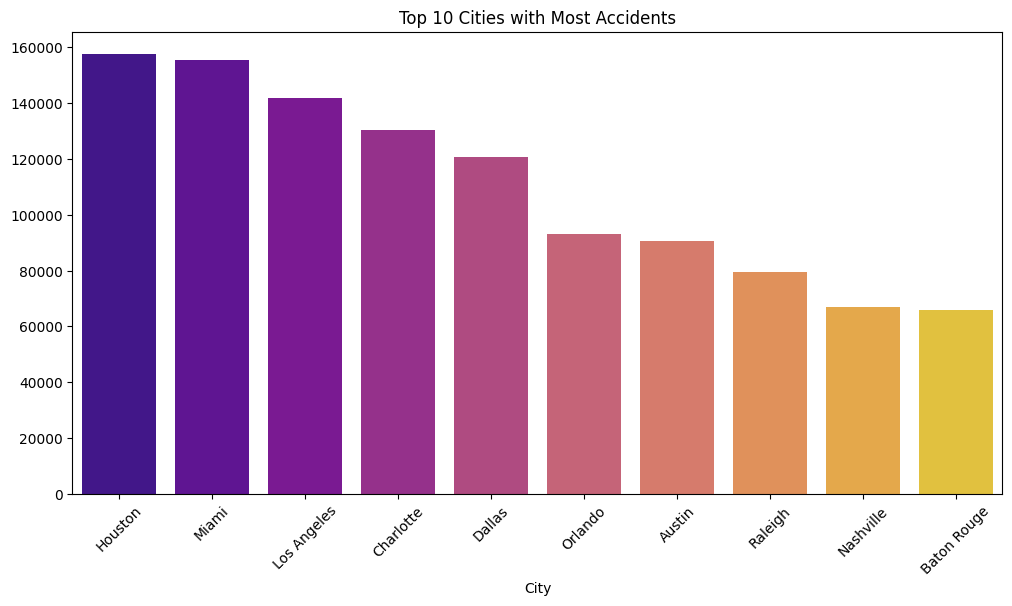

In [ ]:
# Top states
plt.figure(figsize=(12,6))
top_states = df['State'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')
plt.title("Top 10 States with Most Accidents")
plt.show()

# Top cities
plt.figure(figsize=(12,6))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='plasma')
plt.title("Top 10 Cities with Most Accidents")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2250252437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='Set2')


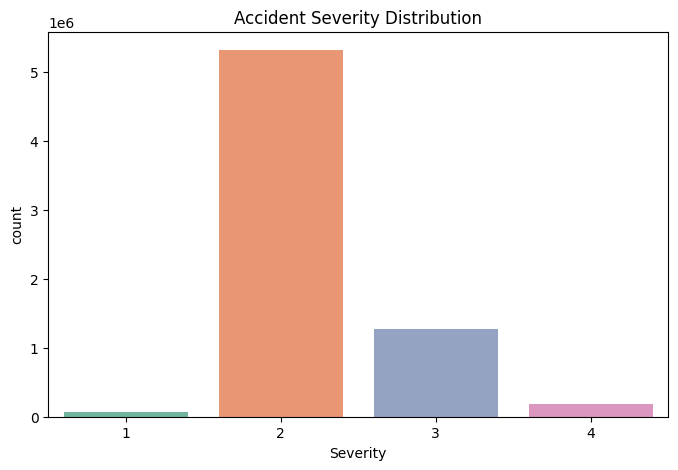

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Severity', data=df, palette='Set2')
plt.title("Accident Severity Distribution")
plt.show()